### 安装依赖

In [ ]:
!pip install pyautogui
!pip install kociemba
!pip install opencv-python
!pip install imutils

In [4]:
cd ..

/Users/wangzhihong/workspace/rubik_cube.py


In [5]:
from rubik import *

## 测试 —— 魔方检测识别

In [6]:
# 如果识别不正确，根据魔方大小修改 `min_scale, max_scale, num_step` 
scale_match.min_scale = 0.8 # 图像较小时调低，默认 0.8
scale_match.max_scale = 3.5 # 图像较大时调高，默认 3.0
scale_match.num_step = 80 # 匹配细度，默认 50 步

注意：初始化时要隐藏下方截图，避免干扰图像检测


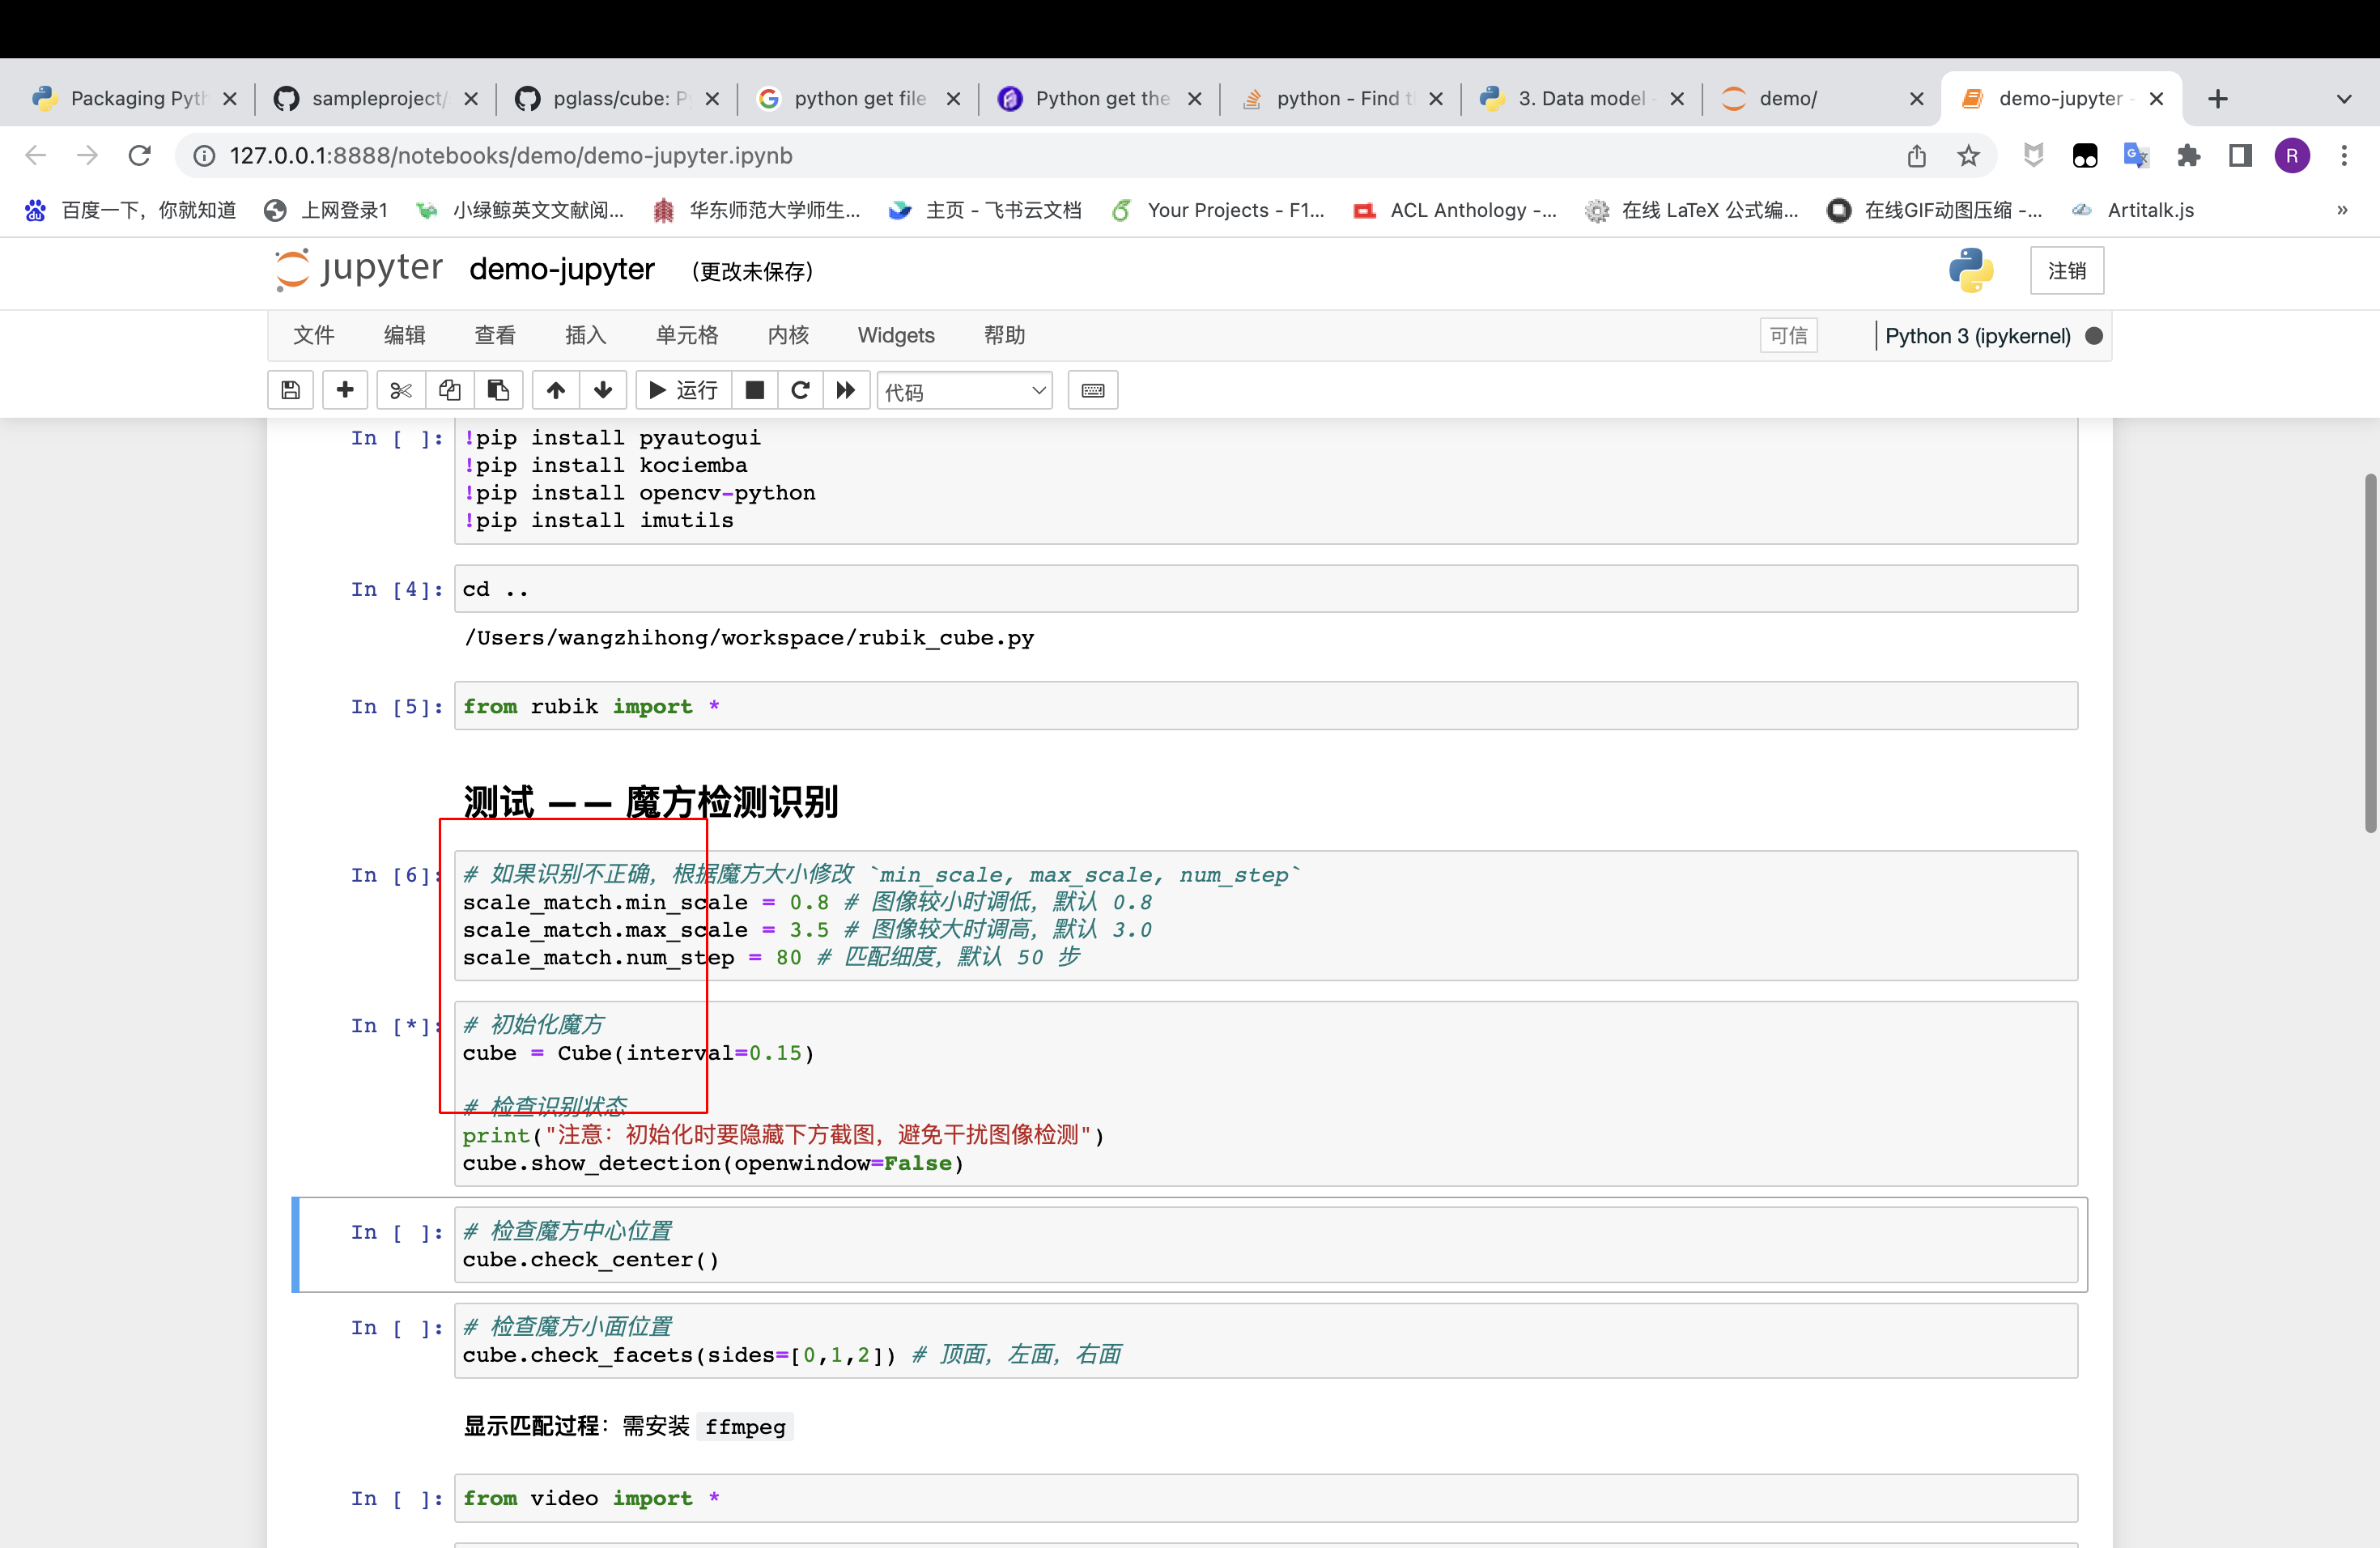

In [7]:
# 初始化魔方
cube = Cube(interval=0.15)

# 检查识别状态
print("注意：初始化时要隐藏下方截图，避免干扰图像检测")
cube.show_detection(openwindow=False)

In [ ]:
# 检查魔方中心位置
cube.check_center()

In [8]:
# 检查魔方小面位置
cube.check_facets(sides=[0,1,2]) # 顶面，左面，右面

正在检查顶面，注意查看鼠标位置是否准确


**显示匹配过程**：需安装 `ffmpeg`

In [9]:
from rubik.video import *

In [10]:
# Get frames
images = detect_image(cube.image, template, frames=True)
# images.sort(key = lambda x: x[0])
frames = [cv2PIL(img[1]) for img in images]

# export video
vid_name, vid_comp = "video.mp4", "video_comp.mp4"
imgs_to_video(frames, vid_name, fps=10)
display_video(vid_name, vid_comp)

OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


### 测试 —— 自动操作检测

In [ ]:
# 检查基本旋转
cube.check_basic_moves(facets="UDLRFB")

In [ ]:
# 换心公式
cube.shift_center()
time.sleep(0.3)
cube.shift_center(back=True)

In [11]:
# 检查分布
state = cube.get_cube_distribution(string_code=True)

### 测试 -- 检查颜色

In [ ]:
# 检查颜色
from tools import expand_cube
# state = cube.get_cube_distribution(string_code=True)
print(expand_cube(state))

## Example 1-求解魔方

In [ ]:
# 魔方初始化，设置操作的时间间隔
cube = Cube(interval=0.2)

In [ ]:
# 识别并求解魔方
cube.auto_solve_cube(wait=False)

## Example 2-构造魔方

In [ ]:
from tools import expand_cube
txt = "DUDUUUDUDBRBRRRBRBLFLFFFLFLUDUDDDUDUFLFLLLFLFRBRBBBRBR"
state = input(f"请输入魔方状态的代码，直接回车使用示例代码\n示例：\n{txt}\n")
if not state: state = txt
try:
    kb.solve(state) # 检验是否有效
except:
    print("魔方代码输入有误！请检查")
    print(expand_cube(state))
print("输入魔方的展开图如下")
print(expand_cube(state))

cube = Cube()

input("按回车，开始构造给定魔方：")
sol = cube.to_cube_state(state)
print("魔方解法为")
for i in sol:
    print(i,end="\t")